In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

Problem 1

In [2]:
#Loading the dataset
fv=pd.read_csv('Fever.csv')
fv.head(5)

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

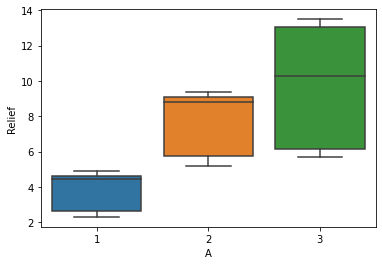

In [3]:
sns.boxplot(x='A',y='Relief', data=fv)

In [4]:
#One way ANOVA for A
formula = 'Relief ~ C(A)'
model = ols(formula, fv).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


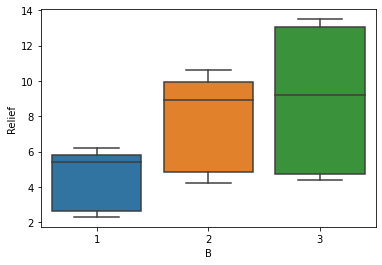

In [5]:
sns.boxplot(x='B',y='Relief', data=fv)

In [6]:
#One way ANOVA for B
formula = 'Relief ~ C(B)'
model = ols(formula, fv).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [7]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, fv).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [8]:
#Average relief of A
fv[['A','Relief']].groupby(['A']).mean()

Relief
A          
1  3.883333
2  7.833333
3  9.833333

In [9]:
#Average relief of B
fv[['B','Relief']].groupby(['B']).mean()

Relief
B          
1  4.633333
2  7.933333
3  8.983333

In [10]:
##Average relief of A and B combined
fv[['A','B','Relief']].groupby(['A','B']).mean()

Relief
A B        
1 1   2.475
  2   4.600
  3   4.575
2 1   5.450
  2   8.925
  3   9.125
3 1   5.975
  2  10.275
  3  13.250

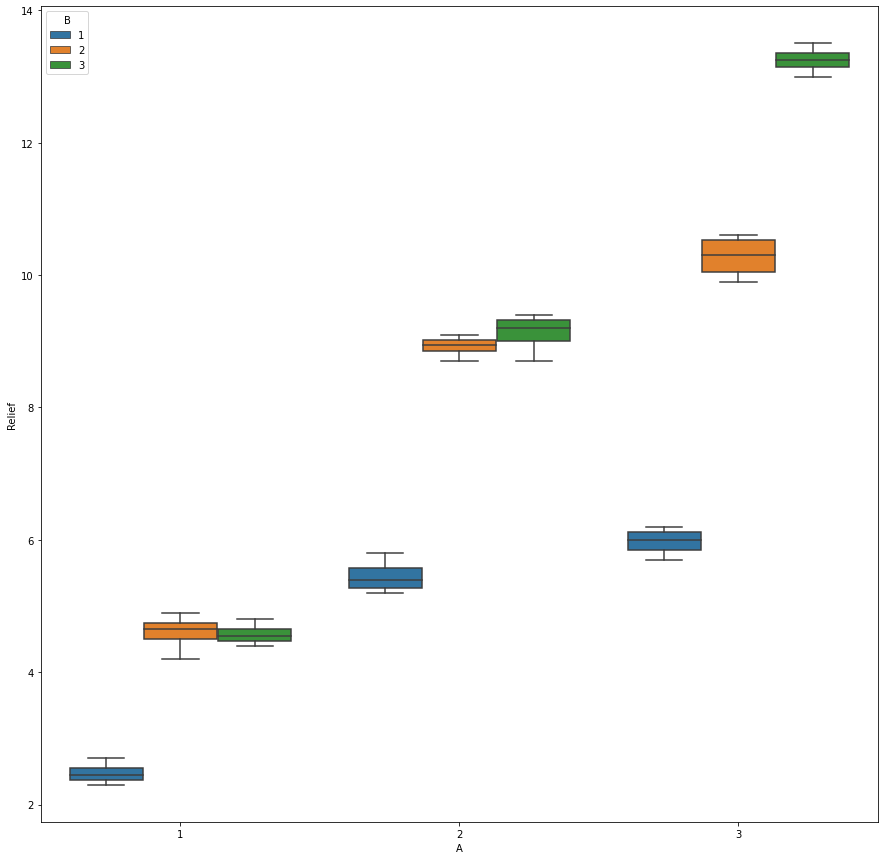

In [11]:
plt.figure(figsize=(15,15))
sns.boxplot(x='A', y='Relief', hue='B', data=fv)

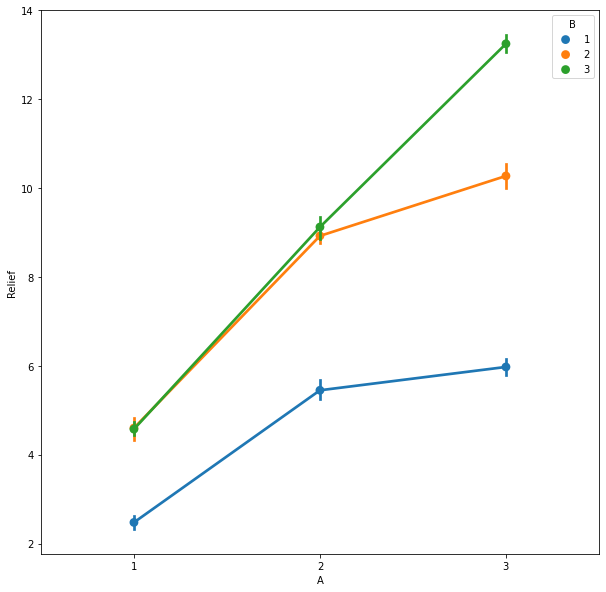

In [12]:
plt.figure(figsize=(10,10))
sns.pointplot(x='A', y='Relief', hue='B', data=fv)

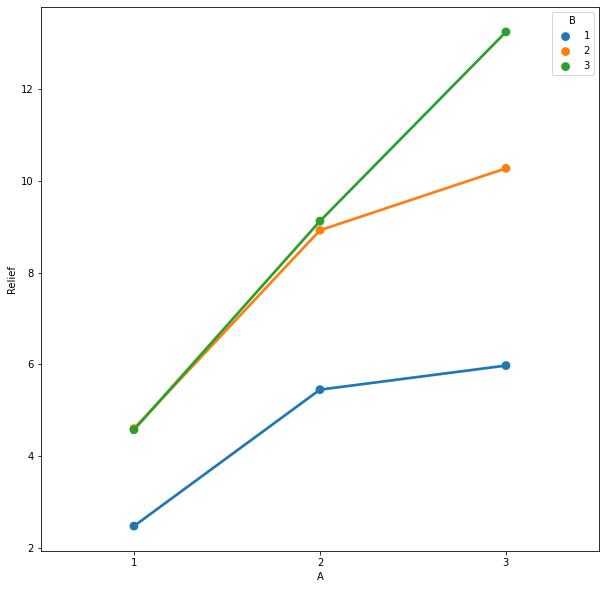

In [13]:
plt.figure(figsize=(10,10))
sns.pointplot(x='A', y='Relief', hue='B', data=fv,ci=None)

In [14]:
#Interaction effect of A and B
formula = 'Relief ~ C(A) + C(B)+C(A):C(B)'
model = ols(formula, fv).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


Problem 2

In [15]:
#Loading the dataset
edu=pd.read_csv('Education - Post 12th Standard-1.csv')
edu.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [16]:
#Datatype of variables
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [17]:
#Descriptive statistics of variables
edu.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [18]:
#Verifying null values
edu.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [19]:
#Varaince of all variables
edu.var()

Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F.Undergrad    2.352658e+07
P.Undergrad    2.317799e+06
Outstate       1.618466e+07
Room.Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.666086e+02
Terminal       2.167478e+02
S.F.Ratio      1.566853e+01
perc.alumni    1.535567e+02
Expend         2.726687e+07
Grad.Rate      2.950737e+02
dtype: float64

In [20]:
#IQR before scaling
edu.quantile(q=0.75,axis=0) - edu.quantile(q=0.25,axis=0)

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64

In [21]:
#Number of duplicate rows
dups=edu.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [22]:
#Median of all variables
edu.median()

Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64

In [23]:
#Skewness of all variables
edu.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

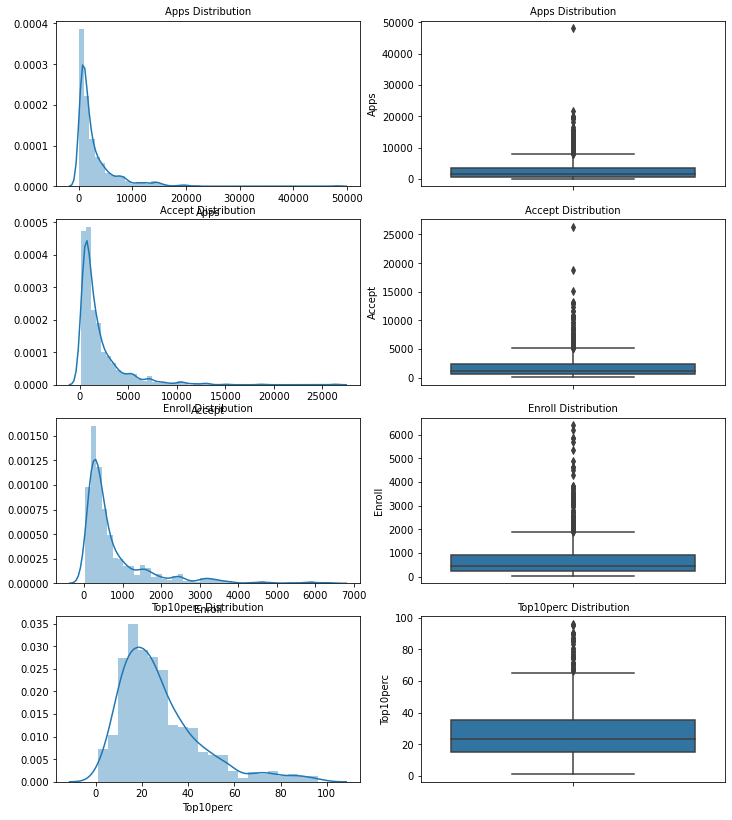

In [24]:
## Univariate except Names column

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=10)
a = sns.boxplot(edu['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=10)


a = sns.distplot(edu['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=10)

a = sns.boxplot(edu['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=10)

a = sns.distplot(edu['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.boxplot(edu['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=10)


a = sns.distplot(edu['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=10)

a = sns.boxplot(edu['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=10)

plt.show()

In [25]:
## Univariate except Names column

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=10)
a = sns.boxplot(edu['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=10)

a = sns.distplot(edu['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.boxplot(edu['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.distplot(edu['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.boxplot(edu['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=10)


a = sns.distplot(edu['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=10)

a = sns.boxplot(edu['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=10)

plt.show()

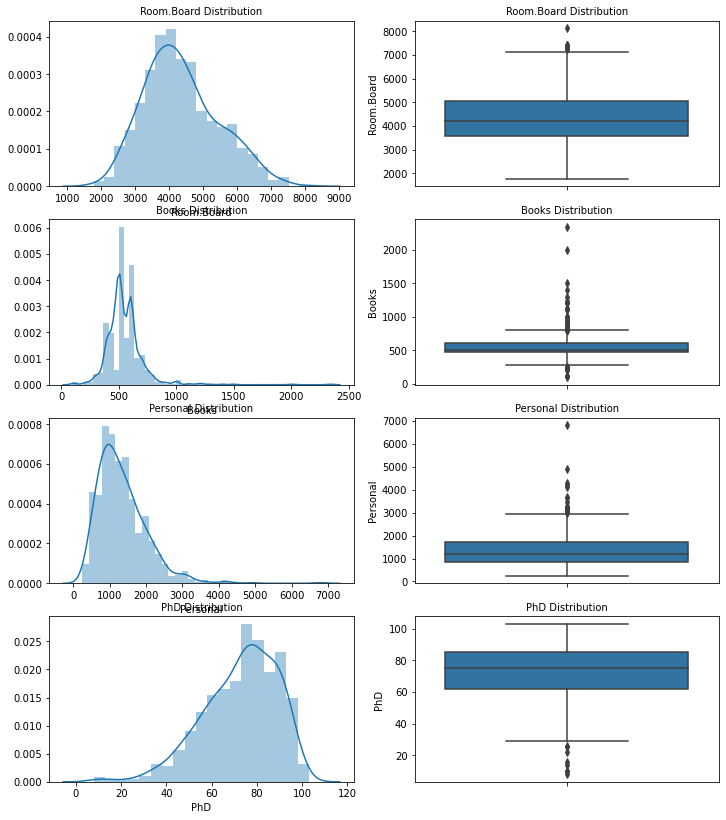

In [26]:
## Univariate except Names column

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=10)
a = sns.boxplot(edu['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=10)

a = sns.distplot(edu['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=10)

a = sns.boxplot(edu['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=10)

a = sns.distplot(edu['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=10)

a = sns.boxplot(edu['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=10)


a = sns.distplot(edu['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=10)

a = sns.boxplot(edu['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=10)

plt.show()

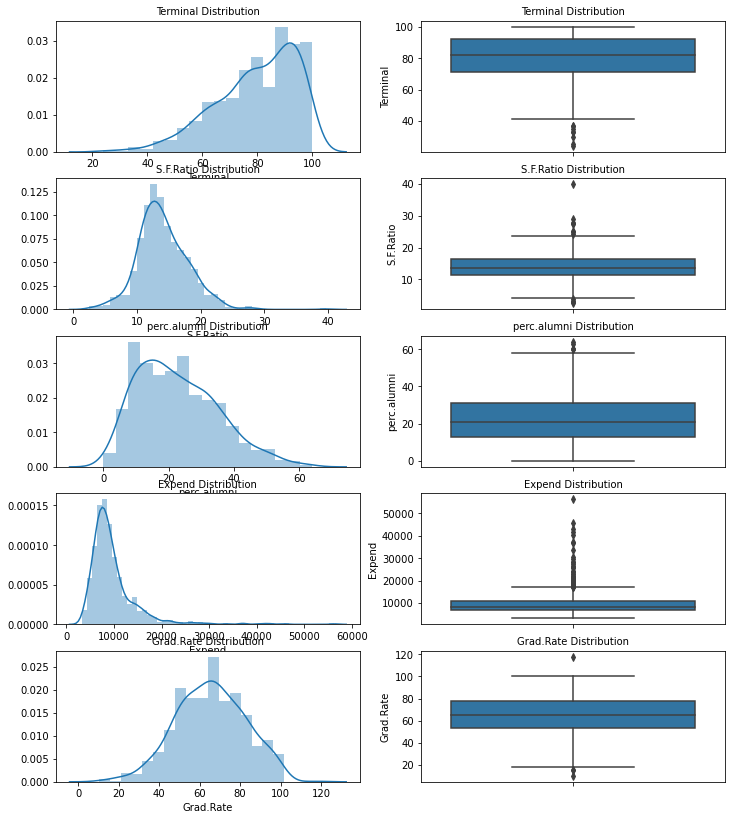

In [27]:
## Univariate except Names column

fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(edu['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=10)
a = sns.boxplot(edu['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=10)

a = sns.distplot(edu['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.boxplot(edu['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.distplot(edu['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.boxplot(edu['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=10)


a = sns.distplot(edu['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=10)

a = sns.boxplot(edu['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=10)

a = sns.distplot(edu['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=10)

a = sns.boxplot(edu['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=10)
plt.show()

(array([638.,  92.,  31.,  11.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([   81. ,  4882.3,  9683.6, 14484.9, 19286.2, 24087.5, 28888.8,
        33690.1, 38491.4, 43292.7, 48094. ]),
 <a list of 10 Patch objects>)

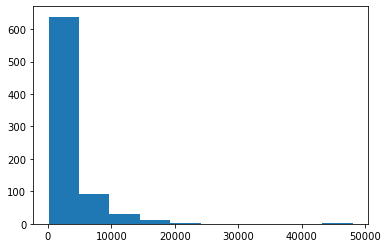

In [28]:
plt.hist(edu['Apps'])

(array([603., 109.,  40.,  14.,   7.,   2.,   0.,   1.,   0.,   1.]),
 array([   72. ,  2697.8,  5323.6,  7949.4, 10575.2, 13201. , 15826.8,
        18452.6, 21078.4, 23704.2, 26330. ]),
 <a list of 10 Patch objects>)

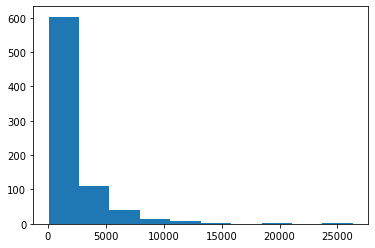

In [29]:
plt.hist(edu['Accept'])

(array([521., 123.,  60.,  30.,  16.,  16.,   1.,   4.,   2.,   4.]),
 array([  35. ,  670.7, 1306.4, 1942.1, 2577.8, 3213.5, 3849.2, 4484.9,
        5120.6, 5756.3, 6392. ]),
 <a list of 10 Patch objects>)

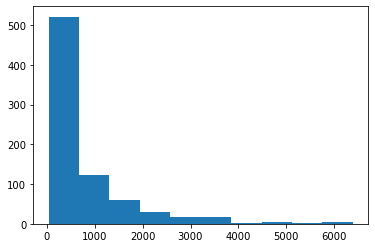

In [30]:
plt.hist(edu['Enroll'])

In [31]:
plt.hist(edu['Top10perc'])

(array([ 94., 196., 220., 110.,  67.,  40.,  13.,  17.,  10.,  10.]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <a list of 10 Patch objects>)

(array([  8.,  41.,  97., 106., 140., 126., 102.,  57.,  52.,  48.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <a list of 10 Patch objects>)

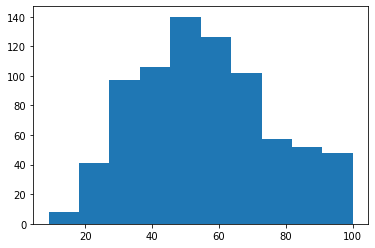

In [32]:
plt.hist(edu['Top25perc'])

In [33]:
plt.hist(edu['F.Undergrad'])

(array([548.,  99.,  44.,  31.,  27.,  11.,   6.,   4.,   4.,   3.]),
 array([  139. ,  3289.4,  6439.8,  9590.2, 12740.6, 15891. , 19041.4,
        22191.8, 25342.2, 28492.6, 31643. ]),
 <a list of 10 Patch objects>)

In [34]:
plt.hist(edu['P.Undergrad'])

(array([704.,  50.,  13.,   5.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 2.18450e+03, 4.36800e+03, 6.55150e+03, 8.73500e+03,
        1.09185e+04, 1.31020e+04, 1.52855e+04, 1.74690e+04, 1.96525e+04,
        2.18360e+04]),
 <a list of 10 Patch objects>)

(array([ 17.,  93., 142., 143., 142.,  94.,  49.,  44.,  47.,   6.]),
 array([ 2340.,  4276.,  6212.,  8148., 10084., 12020., 13956., 15892.,
        17828., 19764., 21700.]),
 <a list of 10 Patch objects>)

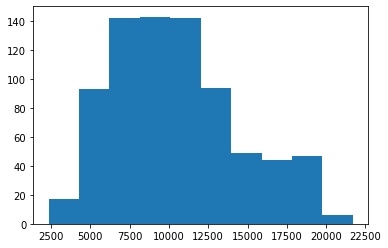

In [35]:
plt.hist(edu['Outstate'])

In [36]:
plt.hist(edu['Room.Board'])

(array([ 10.,  67., 155., 185., 153.,  86.,  70.,  39.,  11.,   1.]),
 array([1780. , 2414.4, 3048.8, 3683.2, 4317.6, 4952. , 5586.4, 6220.8,
        6855.2, 7489.6, 8124. ]),
 <a list of 10 Patch objects>)

In [37]:
plt.hist(edu['Books'])

(array([ 25., 397., 317.,  22.,  10.,   3.,   1.,   0.,   1.,   1.]),
 array([  96. ,  320.4,  544.8,  769.2,  993.6, 1218. , 1442.4, 1666.8,
        1891.2, 2115.6, 2340. ]),
 <a list of 10 Patch objects>)

(array([229., 316., 160.,  48.,  17.,   3.,   2.,   1.,   0.,   1.]),
 array([ 250.,  905., 1560., 2215., 2870., 3525., 4180., 4835., 5490.,
        6145., 6800.]),
 <a list of 10 Patch objects>)

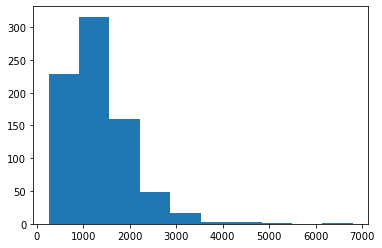

In [38]:
plt.hist(edu['Personal'])

In [39]:
plt.hist(edu['PhD'])

(array([  5.,   3.,  14.,  27.,  67., 107., 153., 176., 172.,  53.]),
 array([  8. ,  17.5,  27. ,  36.5,  46. ,  55.5,  65. ,  74.5,  84. ,
         93.5, 103. ]),
 <a list of 10 Patch objects>)

(array([  3.,   5.,  13.,  27.,  52.,  86., 120., 119., 177., 175.]),
 array([ 24. ,  31.6,  39.2,  46.8,  54.4,  62. ,  69.6,  77.2,  84.8,
         92.4, 100. ]),
 <a list of 10 Patch objects>)

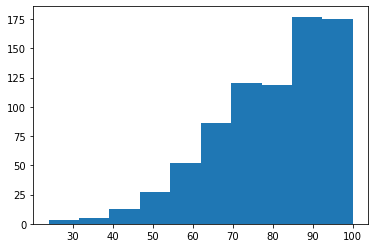

In [40]:
plt.hist(edu['Terminal'])

(array([ 17.,  64., 312., 236., 111.,  31.,   4.,   1.,   0.,   1.]),
 array([ 2.5 ,  6.23,  9.96, 13.69, 17.42, 21.15, 24.88, 28.61, 32.34,
        36.07, 39.8 ]),
 <a list of 10 Patch objects>)

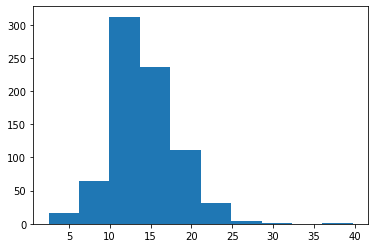

In [41]:
plt.hist(edu['S.F.Ratio'])

In [42]:
plt.hist(edu['perc.alumni'])

(array([ 43., 138., 175., 125., 109., 100.,  41.,  29.,  11.,   6.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <a list of 10 Patch objects>)

(array([399., 273.,  75.,  14.,   7.,   2.,   2.,   3.,   1.,   1.]),
 array([ 3186. ,  8490.7, 13795.4, 19100.1, 24404.8, 29709.5, 35014.2,
        40318.9, 45623.6, 50928.3, 56233. ]),
 <a list of 10 Patch objects>)

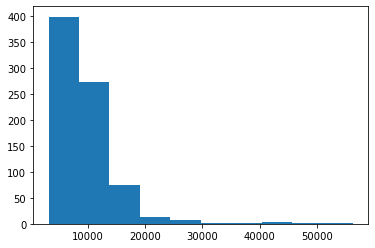

In [43]:
plt.hist(edu['Expend'])

In [44]:
plt.hist(edu['Grad.Rate'])

(array([  4.,  15.,  46., 133., 152., 188., 142.,  71.,  25.,   1.]),
 array([ 10. ,  20.8,  31.6,  42.4,  53.2,  64. ,  74.8,  85.6,  96.4,
        107.2, 118. ]),
 <a list of 10 Patch objects>)

In [45]:
#Correlation matrix
edu_corr=edu.corr(method='pearson')
edu_corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [46]:
#Heatmap for correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(edu_corr,annot=True)

In [47]:
#Scatter plot for variables with strong correlation
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.scatterplot(edu['Apps'],edu['Accept'] , ax=axes[0][0])
#a.set_title("No. of applications vs Accepted applications",fontsize=10)

a = sns.scatterplot(edu['Apps'],edu['Enroll'] , ax=axes[0][1])
#a.set_title("No. of applications vs No. of students enrolled",fontsize=10)

a = sns.scatterplot(edu['Apps'],edu['F.Undergrad'] , ax=axes[1][0])
#a.set_title("Books Distribution",fontsize=10)

a = sns.scatterplot(edu['Accept'],edu['Enroll'] , ax=axes[1][1])
#a.set_title("Books Distribution",fontsize=10)

a = sns.scatterplot(edu['Accept'],edu['F.Undergrad'] , ax=axes[2][0])
#a.set_title("Personal Distribution",fontsize=10)

a = sns.scatterplot(edu['Enroll'],edu['F.Undergrad'] , ax=axes[2][1])
#a.set_title("Personal Distribution",fontsize=10)


a = sns.scatterplot(edu['Top10perc'],edu['Top25perc'] , ax=axes[3][0])
#a.set_title("PhD Distribution",fontsize=10)

a = sns.scatterplot(edu['PhD'],edu['Terminal'] , ax=axes[3][1])
#a.set_title("PhD Distribution",fontsize=10)

plt.show()

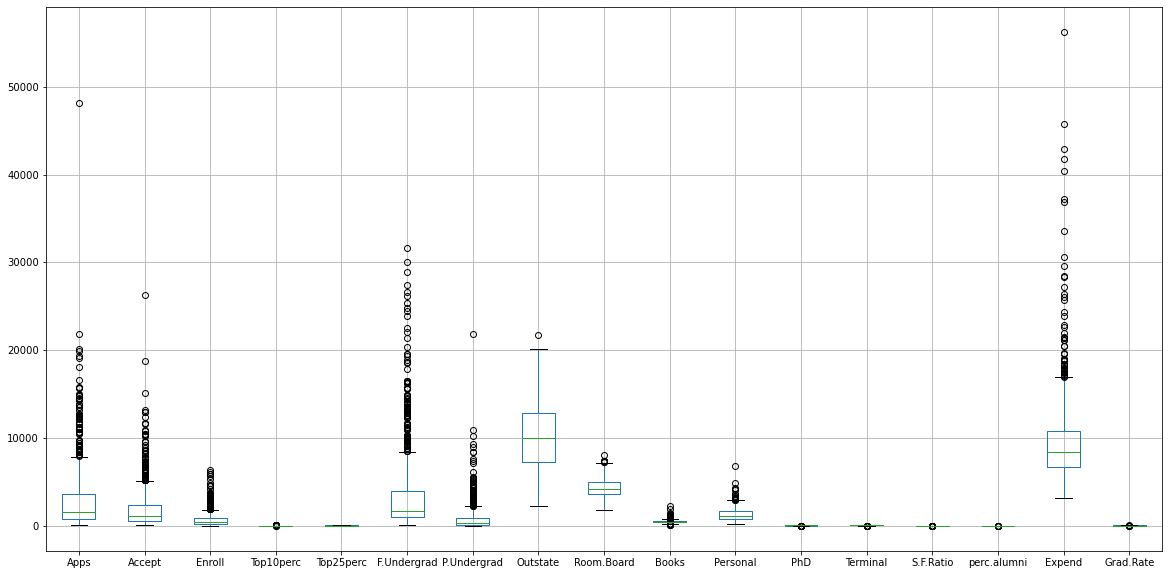

In [48]:
#Boxplot before scaling
edu.boxplot(figsize=(20,10))

In [49]:
#Pairplot - Multivariate analysis
plt.figure(figsize=(10,10))
sns.pairplot(edu)

<Figure size 720x720 with 0 Axes>

In [50]:
#Covariance before scaling
edu.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [51]:
#Dropping Names column
edu_new=edu.drop(['Names'],axis=1)
edu_new

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0        7440        3300    450      2200   70        78       18.1   
1       12280        6450    750      1500   29        30       12.2   
2       11250        3750    400      1165   53        66       12.9   
3       12960        5450    450       875   92        97        7.7   
4        7560        4120    800      1500   76        72       11.9   
..        ...         ...    ...       ...  ...       ...        ...   
772      6797        3900    500      1200   60        60       21.0   
773     11520        4960    600      1250   73        75       13.3   
774      6900        4200    617       781   67        75       14.4   
775     19840        6510    630      2115   96        96        5.8   
776      4990        3560    500      1250   75        75       18.1   

     perc.alumni  Expend  Grad.Rate  
0             12    7041         60  
1             16   10527         56  
2             30    8735         54  
3             37   19016         59  
4              2   10922         15  
..           ...     ...        ...  
772           14    4469         40  
773           31    9189         83  
774           20    8323         49  
775           49   40386         99  
776           28    4509         99  

[777 rows x 17 columns]

In [52]:
#Scaling using Z scores
from scipy.stats import zscore
edu_scale=edu_new.apply(zscore)
edu_scale.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [53]:
#IQR after scaling
edu_scale.quantile(q=0.75,axis=0) - edu_scale.quantile(q=0.25,axis=0)

Apps           0.736353
Accept         0.742998
Enroll         0.710764
Top10perc      1.134494
Top25perc      1.414711
F.Undergrad    0.621583
P.Undergrad    0.573137
Outstate       1.394131
Room.Board     1.325741
Books          0.787883
Personal       1.256215
PhD            1.409517
Terminal       1.427321
S.F.Ratio      1.263966
perc.alumni    1.453509
Expend         0.781656
Grad.Rate      1.456312
dtype: float64

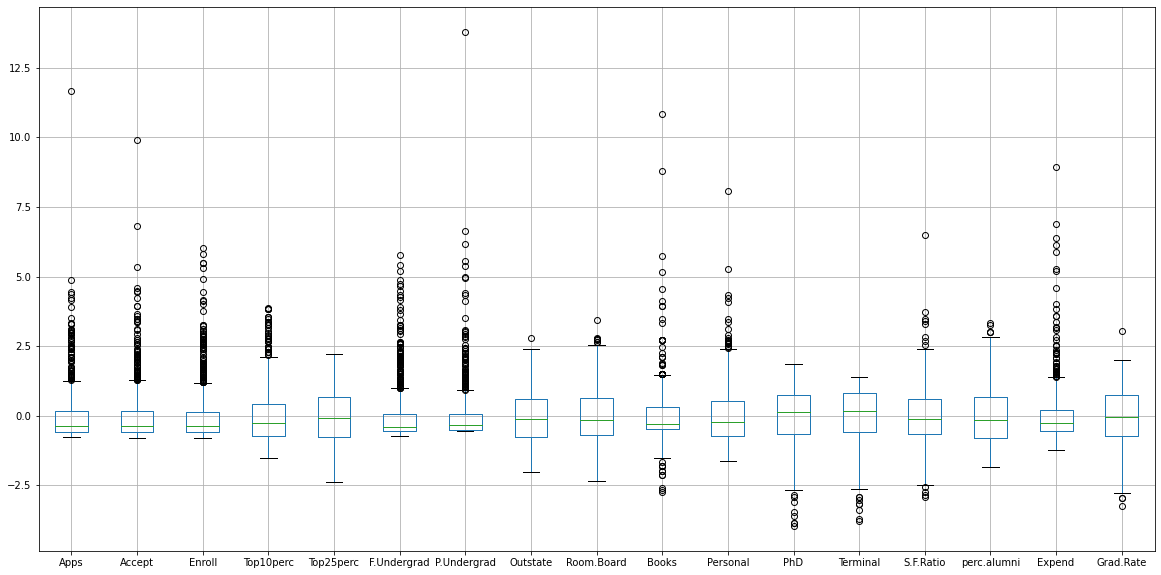

In [54]:
#Boxplot after scaling
edu_scale.boxplot(figsize=(20,10))

In [55]:
#Covariance matrix before scaling
cov_matrix_bs = np.cov(edu_new.T)
print('Covariance Matrix \n%s', cov_matrix_bs)

Covariance Matrix 
%s [[ 1.49784595e+07  8.94985981e+06  3.04525599e+06  2.31327731e+04
   2.69526635e+04  1.52897025e+07  2.34662015e+06  7.80970356e+05
   7.00072872e+05  8.47037526e+04  4.68346833e+05  2.46894337e+04
   2.10530676e+04  1.46506058e+03 -4.32712238e+03  5.24617110e+06
   9.75642164e+03]
 [ 8.94985981e+06  6.00795970e+06  2.07626776e+06  8.32112487e+03
   1.20134048e+04  1.03935824e+07  1.64666972e+06 -2.53962285e+05
   2.44347147e+05  4.59428079e+04  3.33556631e+05  1.42382015e+04
   1.21820938e+04  1.70983819e+03 -4.85948702e+03  1.59627169e+06
   2.83416292e+03]
 [ 3.04525599e+06  2.07626776e+06  8.63368392e+05  2.97158341e+03
   4.17259244e+03  4.34752988e+06  7.25790674e+05 -5.81188483e+05
  -4.09970592e+04  1.72911997e+04  1.76737970e+05  5.02896117e+03
   4.21708603e+03  8.72684773e+02 -2.08169379e+03  3.11345431e+05
  -3.56587977e+02]
 [ 2.31327731e+04  8.32112487e+03  2.97158341e+03  3.11182456e+02
   3.11630480e+02  1.20891137e+04 -2.82947498e+03  3.99071798e+

In [56]:
# PCA
# Step 1 - covariance matrix after scaling

cov_matrix = np.cov(edu_scale.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [57]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]
Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.9

In [58]:
#Eigen vectors in linear algebra
eig_vecs1=eig_vecs.T
eig_vecs1

array([[-2.48765602e-01, -2.07601502e-01, -1.76303592e-01,
        -3.54273947e-01, -3.44001279e-01, -1.54640962e-01,
        -2.64425045e-02, -2.94736419e-01, -2.49030449e-01,
        -6.47575181e-02,  4.25285386e-02, -3.18312875e-01,
        -3.17056016e-01,  1.76957895e-01, -2.05082369e-01,
        -3.18908750e-01, -2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [ 6.30921033e-02,  1.01249056e-01,  8.29855709e-02,
        -3.50555339e-02,  2.41479376e-02,  6.13929764e-02,
        -1.39681716e-01, -4.65988731e-02, -1.48967389e-01,
        -6.77411649e-01, -4.99721120e-01,  1.27028371e-01,
         6.60375454e-02,  2.89848401e-01,  1.46989274e-01,
        -2.26743985e-01,  2.0

In [59]:
#Converting Eigen vector into dataframe
edu_vecs1 = pd.DataFrame(eig_vecs1,columns=list(edu_scale))
edu_vecs1

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  -0.248766 -0.207602 -0.176304  -0.354274  -0.344001    -0.154641   
1   0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2   0.063092  0.101249  0.082986  -0.035056   0.024148     0.061393   
3  -0.281311 -0.267817 -0.161827   0.051547   0.109767    -0.100412   
4   0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5   0.016237 -0.007535  0.042558   0.052693  -0.033092     0.043454   
6   0.042486  0.012950  0.027693   0.161332   0.118486     0.025076   
7   0.103090  0.056271 -0.058662   0.122678   0.102492    -0.078890   
8   0.090227  0.177865  0.128561  -0.341100  -0.403712     0.059442   
9  -0.052510 -0.041140 -0.034488  -0.064026  -0.014549    -0.020847   
10  0.358970 -0.543427  0.609651  -0.144986   0.080348    -0.414705   
11 -0.459139  0.518569  0.404318   0.148739  -0.051868    -0.560363   
12  0.043046 -0.058406 -0.069399  -0.008105  -0.273128    -0.081158   
13 -0.133406  0.145498 -0.029590  -0.697723   0.617275    -0.009916   
14  0.080633  0.033467 -0.085697  -0.107828   0.151742    -0.056373   
15 -0.595831 -0.292642  0.444638  -0.001023  -0.021884     0.523622   
16  0.024071 -0.145102  0.011143   0.038554  -0.089352     0.056177   

    P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     -0.026443 -0.294736   -0.249030 -0.064758  0.042529 -0.318313 -0.317056   
1      0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     -0.139682 -0.046599   -0.148967 -0.677412 -0.499721  0.127028  0.066038   
3      0.158558 -0.131291   -0.184996 -0.087089  0.230711  0.534725  0.519443   
4      0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5      0.191199  0.030000   -0.162755 -0.641055  0.331398 -0.091256 -0.154928   
6     -0.061042 -0.108529   -0.209744  0.149692 -0.633790  0.001096  0.028477   
7     -0.570784 -0.009846    0.221453 -0.213293  0.232661  0.077040  0.012161   
8     -0.560673  0.004573   -0.275023  0.133663  0.094469  0.185182  0.254938   
9      0.223106 -0.186675   -0.298324  0.082029 -0.136028  0.123452  0.088578   
10     0.009018  0.050900    0.001146  0.000773 -0.001114  0.013813  0.006209   
11     0.052731 -0.101595    0.025929 -0.002883  0.012890 -0.029808  0.027076   
12     0.100693  0.143221   -0.359322  0.031940 -0.018578  0.040372 -0.058973   
13    -0.020952 -0.038354   -0.003402  0.009439  0.003090  0.112056 -0.158910   
14     0.019286 -0.034012   -0.058429 -0.066849  0.027529 -0.691126  0.671009   
15    -0.125998  0.141856    0.069749 -0.011438 -0.039455 -0.127696  0.058313   
16    -0.063536 -0.823444    0.354560 -0.028159 -0.039264  0.023222  0.016485   

    S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0    0.176958    -0.205082 -0.318909  -0.252316  
1    0.246665    -0.246595 -0.131690  -0.169241  
2    0.289848     0.146989 -0.226744   0.208065  
3    0.161189    -0.017314 -0.079273  -0.269129  
4   -0.079388    -0.216297  0.075958  -0.109268  
5   -0.487046     0.047340  0.298119  -0.216163  
6   -0.219259    -0.243321  0.226584  -0.559944  
7    0.083605    -0.678524  0.054159   0.005336  
8   -0.274544     0.255335  0.049139  -0.041904  
9   -0.472045    -0.423000 -0.132286   0.590271  
10  -0.002222    -0.019187 -0.035310  -0.013071  
11   0.021248    -0.003334  0.043880   0.005008  
12   0.445001    -0.130728  0.692089   0.219839  
13   0.020899     0.008418  0.227742   0.003394  
14   0.041374    -0.027154  0.073123   0.036477  
15   0.017715    -0.104088  0.093746   0.069197  
16  -0.011026     0.182661  0.325982   0.122107

In [60]:
#Cumulative Variance Explained
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


In [61]:
#Scree plot
plt.plot(var_exp)

In [62]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [63]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 9 PCA dimensions (dimensionality reduction from 18 to 9)

pca = PCA(n_components=9)
data_reduced = pca.fit_transform(edu_scale)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00],
       [-8.79386137e-01,  4.69253269e-02,  3.08740489e-01, ...,
        -1.28288447e-01, -5.52585842e-01,  6.27409633e-01],
       [ 9.30839439e-02,  1.11378046e+00, -1.05452246e-01, ...,
         2.12374567e-01,  8.19690348e-02,  7.23561569e-01]])

In [64]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [65]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234])

In [66]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2, 88.7, 91.8])

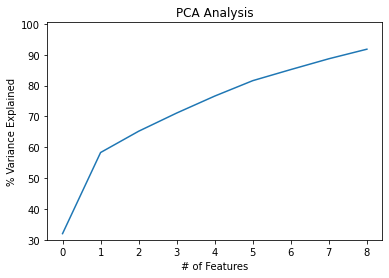

In [67]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [68]:
#Eigen vectors from PCA Components into dataframe
edu_comp = pd.DataFrame(pca.components_,columns=list(edu_scale))
edu_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6 -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   
7 -0.103090 -0.056271  0.058662  -0.122678  -0.102492     0.078890   
8 -0.090227 -0.177865 -0.128561   0.341100   0.403712    -0.059442   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6     0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   
7     0.570784  0.009846   -0.221453  0.213293 -0.232661 -0.077040 -0.012161   
8     0.560673 -0.004573    0.275023 -0.133663 -0.094469 -0.185182 -0.254938   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163  
6   0.219259     0.243321 -0.226584   0.559944  
7  -0.083605     0.678524 -0.054159  -0.005336  
8   0.274544    -0.255335 -0.049139   0.041904

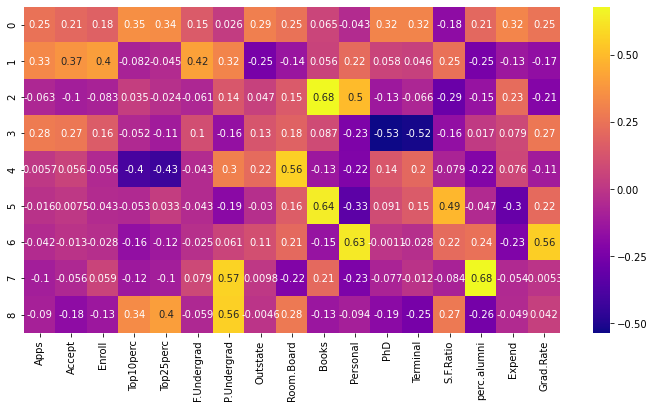

In [69]:
#Heatmap of Eigen vectors
plt.figure(figsize=(12,6))
sns.heatmap(edu_comp,cmap='plasma',annot=True)